# ALGORITMOS MACHINE LEARNING

En este notebook voy a implementar varios modelos de ML para definir cúal es el óptimo para nuestro proyecto, consiguiendo el mayor score

In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline


from sklearn.model_selection import train_test_split
#Cargar el dataset para train y test


df = pd.read_csv('./trainREADY.csv', sep=';', decimal='.')
df_test = pd.read_csv('./testREADY.csv', sep=';', decimal='.')
print(f'Dimensiones del dataset de training: {df.shape}')
print(f'Dimensiones del dataset de test: {df_test.shape}')


Dimensiones del dataset de training: (144069, 24)
Dimensiones del dataset de test: (35959, 24)


In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Lasso
#Preparamos los datos

from sklearn import preprocessing
data1 = df.values
y_train = data1[:,0:1]     # nos quedamos con la 1ª columna, price
X_train = data1[:,1:]      # nos quedamos con el resto
feature_names = df.columns[1:]
# Escalamos (con los datos de train)
scaler = preprocessing.StandardScaler().fit(X_train)
XtrainScaled = scaler.transform(X_train)


In [45]:
data_test2 = df_test.values
y_test = data_test2[:,0:1]     # nos quedamos con la 1ª columna, price
X_test = data_test2[:,1:]      # nos quedamos con el resto
feature_names_test = df_test.columns[1:]

XtestScaled = scaler.transform(X_test)

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

Vamos a empezar con nuestro análisis con Lasso, haciendo uso de GridSearchCV para buscar el parámetro óptimo:


best mean cross-validation score: -0.206
best parameters: {'alpha': 0.002154434690031882}


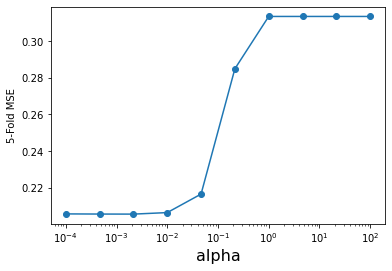

In [47]:
alpha_vector = np.logspace(-4,2,10)
param_grid = {'alpha': alpha_vector }
grid = GridSearchCV(Lasso(), scoring= 'neg_mean_squared_error', param_grid=param_grid, cv = 10)
grid.fit(XtrainScaled, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

#-1 porque es negado
scores = -1*np.array(grid.cv_results_['mean_test_score'])
plt.semilogx(alpha_vector,scores,'-o')
plt.xlabel('alpha',fontsize=16)
plt.ylabel('5-Fold MSE')
plt.show()

In [48]:
from sklearn.metrics import mean_squared_error

alpha_optimo = grid.best_params_['alpha']
lasso = Lasso(alpha = alpha_optimo).fit(XtrainScaled,y_train)

ytrainLasso = lasso.predict(XtrainScaled)
ytestLasso  = lasso.predict(XtestScaled)
mseTrainModelLasso = mean_squared_error(y_train,ytrainLasso)
mseTestModelLasso = mean_squared_error(y_test,ytestLasso)


print('MSE Modelo Lasso (train): %0.3g' % mseTrainModelLasso)
print('MSE Modelo Lasso (test) : %0.3g' % mseTestModelLasso)

print('RMSE Modelo Lasso (train): %0.3g' % np.sqrt(mseTrainModelLasso))
print('RMSE Modelo Lasso (test) : %0.3g' % np.sqrt(mseTestModelLasso))

w = lasso.coef_
for f,wi in zip(feature_names,w):
    print(f,wi)

MSE Modelo Lasso (train): 0.205
MSE Modelo Lasso (test) : 0.238
RMSE Modelo Lasso (train): 0.453
RMSE Modelo Lasso (test) : 0.488
Rango_horario -0.021965512091910687
Dia_semana 0.0008151456541048613
Distrito 0.0007483800320482613
Lugar_accidente 0.11145118638142285
Hielo -0.0
Seco -0.0
Seca_limpia 0.0
Tipo_accidente 0.07084127236086682
Tipo_vehiculo 0.2625350469042545
Tipo_persona 0.05892474474327437
Sexo -0.04789901413840821
Tramo_edad -0.008693175756671324
Latitud -0.00945399839272554
Longitud -0.0017195321352113525
Distancia_ocio_km 0.0
Lejania_ocio 0.029432000924332586
Distancia_radares_km -0.0024393529155975428
Lejania_radares -0.001818073517004715
Anno -0.013218103347647853
Mes -0.0
Dia 0.0
Dia_habil -0.0017244398997167984
Condiciones_adversas_calzada -0.0


Como ya sabemos, Lasso puede utilizarse como selector de características, por lo que las features que tienen como resultado 0.0 las vamos a dropear:

In [49]:
data_Lasso=df.copy()
data_test_Lasso=df_test.copy()

In [50]:
data_Lasso.drop(['Hielo','Seco','Seca_limpia','Distancia_ocio_km','Mes','Dia','Condiciones_adversas_calzada'],axis=1,inplace=True)

In [51]:
data_test_Lasso.drop(['Hielo','Seco','Seca_limpia','Distancia_ocio_km','Mes','Dia','Condiciones_adversas_calzada'],axis=1,inplace=True)

In [52]:
data1 = data_Lasso.values
y_train = data1[:,0:1]     # nos quedamos con la 1ª columna, price
X_train = data1[:,1:]      # nos quedamos con el resto
feature_names = data_Lasso.columns[1:]
# Escalamos (con los datos de train)
scaler = preprocessing.StandardScaler().fit(X_train)
XtrainScaled = scaler.transform(X_train)

In [53]:
data2 = data_test_Lasso.values
y_test = data2[:,0:1]     # nos quedamos con la 1ª columna, price
X_test = data2[:,1:]      # nos quedamos con el resto
feature_names_test = data_test_Lasso.columns[1:]

XtestScaled = scaler.transform(X_test)

Volvemos a hacer Lasso para ver si mejora nuestro modelo sin las features eliminadas

best mean cross-validation score: -0.206
best parameters: {'alpha': 0.0018329807108324356}


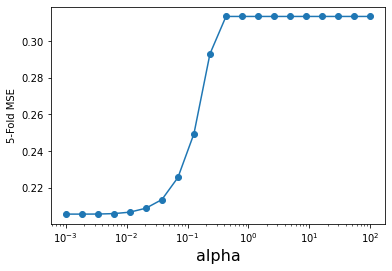

In [54]:
alpha_vector = np.logspace(-3,2,20)
param_grid = {'alpha': alpha_vector }
grid = GridSearchCV(Lasso(), scoring= 'neg_mean_squared_error', param_grid=param_grid, cv = 10)
grid.fit(XtrainScaled, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

#-1 porque es negado
scores = -1*np.array(grid.cv_results_['mean_test_score'])
plt.semilogx(alpha_vector,scores,'-o')
plt.xlabel('alpha',fontsize=16)
plt.ylabel('5-Fold MSE')
plt.show()

In [55]:
from sklearn.metrics import mean_squared_error

alpha_optimo = grid.best_params_['alpha']
lasso = Lasso(alpha = alpha_optimo).fit(XtestScaled,y_test)

ytrainLasso = lasso.predict(XtrainScaled)
ytestLasso  = lasso.predict(XtestScaled)
mseTrainModelLasso = mean_squared_error(y_train,ytrainLasso)
mseTestModelLasso = mean_squared_error(y_test,ytestLasso)


print('MSE Modelo Lasso (train): %0.3g' % mseTrainModelLasso)
print('MSE Modelo Lasso (test) : %0.3g' % mseTestModelLasso)

print('RMSE Modelo Lasso (train): %0.3g' % np.sqrt(mseTrainModelLasso))
print('RMSE Modelo Lasso (test) : %0.3g' % np.sqrt(mseTestModelLasso))

w = lasso.coef_
for f,wi in zip(feature_names,w):
    print(f,wi)

MSE Modelo Lasso (train): 0.221
MSE Modelo Lasso (test) : 0.217
RMSE Modelo Lasso (train): 0.47
RMSE Modelo Lasso (test) : 0.465
Rango_horario -0.024008043245995515
Dia_semana 0.0
Distrito 0.012209961258004403
Lugar_accidente -0.0183021256126115
Tipo_accidente 0.10370950064446093
Tipo_vehiculo 0.2660936598050753
Tipo_persona 0.06074392075124647
Sexo -0.04574540230591465
Tramo_edad -0.00473856573330605
Latitud -0.009141506172253181
Longitud -0.0018316995744208408
Lejania_ocio 0.0319741845611845
Distancia_radares_km -0.005283992889537695
Lejania_radares -0.005460309309810046
Anno -0.01743629382250062
Dia_habil -0.0



Seguimos con una regresión logística :

In [15]:
data1 = df.values
y_train = data1[:,0:1]     # nos quedamos con la 1ª columna, price
X_train = data1[:,1:]      # nos quedamos con el resto
feature_names = df.columns[1:]
# Escalamos (con los datos de train)
scaler = preprocessing.StandardScaler().fit(X_train)
XtrainScaled = scaler.transform(X_train)

In [16]:
data2 = df_test.values
y_test = data2[:,0:1]     # nos quedamos con la 1ª columna, price
X_test = data2[:,1:]      # nos quedamos con el resto
feature_names_test = df_test.columns[1:]

XtestScaled = scaler.transform(X_test)

In [17]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_RL = lr.predict(X_test)
print('Precisión Regresión Logística: {}'.format(accuracy_score(y_test, y_pred_RL))) 

C:\Users\Fernando\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Precisión Regresión Logística: 0.630885174782391


C:\Users\Fernando\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [18]:
#Comparamos las medias
print(y_pred_RL.mean())
print(df['Lesividad_numerica'].mean()) 

0.47014655579966075
0.5380060943020358


Probamos con un KNN :

In [19]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_KNN = knn.predict(X_test)
print('Precisión Vecinos más Cercanos: {}'.format(accuracy_score(y_test, y_pred_KNN))) 

C:\Users\Fernando\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


Precisión Vecinos más Cercanos: 0.5211490864595789


In [20]:
#Comparamos las medias
print(y_pred_KNN.mean())
print(df['Lesividad_numerica'].mean()) 

0.44572985900609025
0.5380060943020358


Ahora seguimos con un árbol de decisión:

best mean cross-validation score: 0.729
best parameters: {'max_depth': 8}


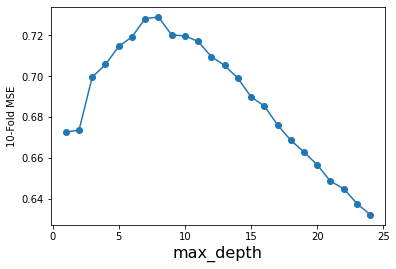

In [21]:
maxDepth = range(1,25)
param_grid = {'max_depth': maxDepth }
grid = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid=param_grid, cv = 10)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth',fontsize=16)
plt.ylabel('10-Fold MSE')

plt.show()

In [22]:
maxDepthOptimo = grid.best_params_['max_depth']
treeModel = DecisionTreeClassifier(max_depth=maxDepthOptimo-1).fit(X_train,y_train)
print("Train: ",treeModel.score(X_train,y_train))
print("Test: ",treeModel.score(X_test,y_test))
algoritmo=DecisionTreeClassifier()
algoritmo.fit(X_train,y_train)
Y_pred_Tree = algoritmo.predict(X_test)
print('Precisión Árboles de Decisión Clasificación: {}'.format(algoritmo.score(X_test,y_test)))

Train:  0.73167024134269
Test:  0.6749353430295615
Precisión Árboles de Decisión Clasificación: 0.6167023554603854


In [23]:
print(Y_pred_Tree.mean())
print(df['Lesividad_numerica'].mean()) 

0.5360827609221613
0.5380060943020358


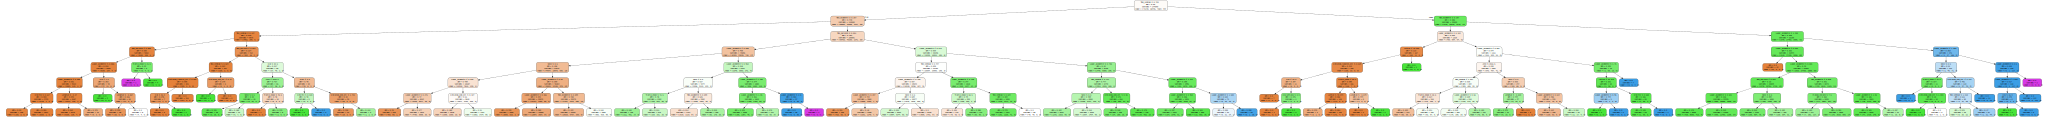

In [24]:
from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(treeModel, out_file=None, 
                         feature_names=df.columns[1:], 
                         filled=True, rounded=True,  
                         special_characters=True)
graph = graphviz.Source(dot_data) 

graph

En este punto vemos que el entrenado es aceptable sin llegar a ser bueno, de ahí el score y la comparación de las medias. Cabe destacar que para ello no hemos seleccionado features más allá de Lasso. Ahora vamos a seleccionar features mediante para posteriormente volver a implementar DecissionTree y ver si mejora algo o no



best mean cross-validation score: 0.727
best parameters: {'max_depth': 7}


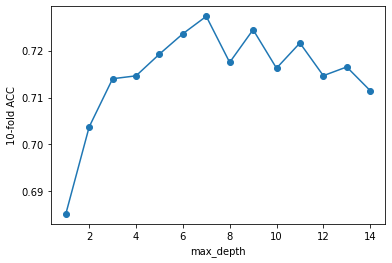

In [25]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier


maxDepth = range(1,15)
tuned_parameters = {'max_depth': maxDepth}

grid = GridSearchCV(RandomForestClassifier(random_state=0, n_estimators=50, max_features='sqrt'), param_grid=tuned_parameters,cv=10) 
grid.fit(X_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth')
plt.ylabel('10-fold ACC')

plt.show()

In [26]:
maxDepthOptimo = grid.best_params_['max_depth']

bagModel = RandomForestClassifier(max_depth=maxDepthOptimo-1,n_estimators=50,max_features='sqrt').fit(X_train,y_train)

print("Train: ",bagModel.score(X_train,y_train))
print("Test: ",bagModel.score(X_test,y_test))
algoritmo=RandomForestClassifier()
algoritmo.fit(X_train,y_train)
Y_pred_RF = algoritmo.predict(X_test)

print('Precisión Random Forest: {}'.format(algoritmo.score(X_test, y_test)))

Train:  0.7293102610554665
Test:  0.6963208098111738
Precisión Random Forest: 0.6852248394004282


Como era de esperar ( o al menos nosotros esperábamos ), Random Forest es el modelo que mejor resultado nos da. Vamos a utilizarlo ahora como selector de características:

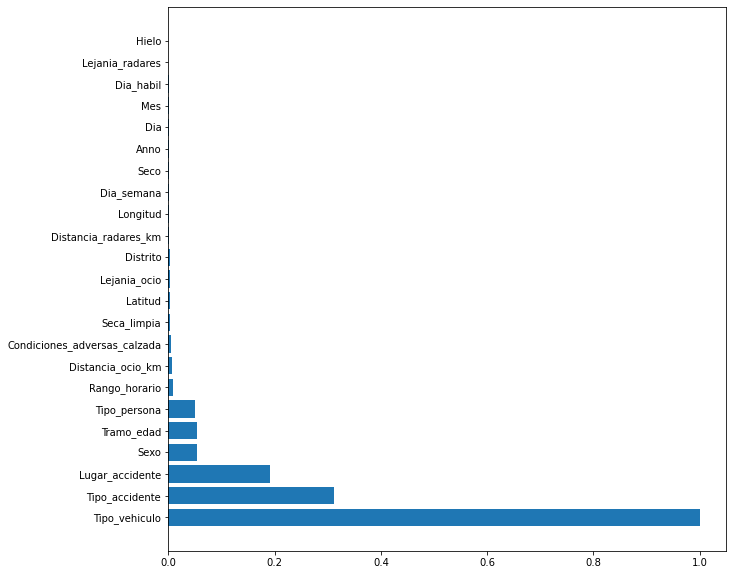

In [27]:
features = df.columns.drop(['Lesividad_numerica'])

importances = bagModel.feature_importances_
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,10))
plt.barh(range(X_train.shape[1]),importances[indices])
plt.yticks(range(X_train.shape[1]),features[indices])
plt.show()

Al no ser muchas variables las que quedan, vamos a eliminar las iguales o inferiores en importancia a 'Distancia_radares_km' y probamos algún modelo a ver si tenemos mejora:

In [28]:
data_Random_Forest=df.copy()

In [29]:
data_test_Random_Forest=df_test.copy()

In [30]:
data_Random_Forest.drop(['Hielo','Lejania_radares','Mes','Anno','Dia_habil','Dia','Dia_semana','Seco','Distancia_radares_km'],axis=1,inplace=True)

In [31]:
data_test_Random_Forest.drop(['Hielo','Lejania_radares','Mes','Anno','Dia_habil','Dia','Dia_semana','Seco','Distancia_radares_km'],axis=1,inplace=True)

In [32]:
data1 = data_Random_Forest.values
y_train = data1[:,0:1]     # nos quedamos con la 1ª columna, price
X_train = data1[:,1:]      # nos quedamos con el resto
feature_names = data_Random_Forest.columns[1:]
# Escalamos (con los datos de train)
scaler = preprocessing.StandardScaler().fit(X_train)
XtrainScaled = scaler.transform(X_train)

In [33]:
data2 = data_test_Random_Forest.values
y_test = data2[:,0:1]     # nos quedamos con la 1ª columna, price
X_test = data2[:,1:]      # nos quedamos con el resto
feature_names_test = data_test_Random_Forest.columns[1:]

XtestScaled = scaler.transform(X_test)

best mean cross-validation score: 0.738
best parameters: {'max_depth': 14}


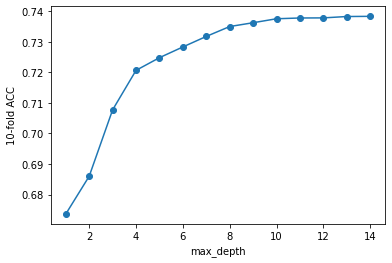

In [34]:
maxDepth = range(1,15)
tuned_parameters = {'max_depth': maxDepth}

grid = GridSearchCV(RandomForestClassifier(random_state=0, n_estimators=50, max_features='sqrt'), param_grid=tuned_parameters,cv=10) 
grid.fit(X_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth')
plt.ylabel('10-fold ACC')

plt.show()

In [35]:
maxDepthOptimo = grid.best_params_['max_depth']

bagModel = RandomForestClassifier(max_depth=maxDepthOptimo-6,n_estimators=50,max_features='sqrt').fit(X_train,y_train)

print("Train: ",bagModel.score(X_train,y_train))
print("Test: ",bagModel.score(X_test,y_test))
algoritmo=RandomForestClassifier()
algoritmo.fit(X_train,y_train)
Y_pred_RF = algoritmo.predict(X_test)

print('Precisión Random Forest: {}'.format(algoritmo.score(X_test, y_test)))

Train:  0.7402425226801047
Test:  0.6897299702438888
Precisión Random Forest: 0.6751300091771184


In [36]:
print(Y_pred_RF.mean())
print(df['Lesividad_numerica'].mean()) 

0.46942351010873495
0.5380060943020358


Observamos como los valores son muy similares después de la selección de características, incluso algo peor, pero también tenemos que tener en cuenta que al tener menos features computacionalmente ganamos

# MODELO DEFINITIVO


Hemos elegido quedarnos con nuestro modelo de Random Forest sin quitar las características, dado que es el que mejor salía

In [37]:
data1 = df.values
y_train = data1[:,0:1]     # nos quedamos con la 1ª columna, price
X_train = data1[:,1:]      # nos quedamos con el resto
feature_names = df.columns[1:]
# Escalamos (con los datos de train)
scaler = preprocessing.StandardScaler().fit(X_train)
XtrainScaled = scaler.transform(X_train)

In [38]:
data2 = df_test.values
y_test = data2[:,0:1]     # nos quedamos con la 1ª columna, price
X_test = data2[:,1:]      # nos quedamos con el resto
feature_names_test = df_test.columns[1:]

XtestScaled = scaler.transform(X_test)

best mean cross-validation score: 0.727
best parameters: {'max_depth': 7}


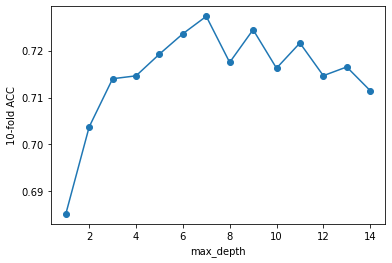

In [39]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier


maxDepth = range(1,15)
tuned_parameters = {'max_depth': maxDepth}

grid = GridSearchCV(RandomForestClassifier(random_state=0, n_estimators=50, max_features='sqrt'), param_grid=tuned_parameters,cv=10) 
grid.fit(X_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth')
plt.ylabel('10-fold ACC')

plt.show()

In [40]:
maxDepthOptimo = grid.best_params_['max_depth']

bagModel = RandomForestClassifier(max_depth=maxDepthOptimo-1,n_estimators=50,max_features='sqrt').fit(X_train,y_train)

print("Train: ",bagModel.score(X_train,y_train))
print("Test: ",bagModel.score(X_test,y_test))
algoritmo=RandomForestClassifier()
algoritmo.fit(X_train,y_train)
Y_pred_RF = algoritmo.predict(X_test)

print('Precisión Random Forest: {}'.format(algoritmo.score(X_test, y_test)))

Train:  0.7306707202798659
Test:  0.7037459328679886
Precisión Random Forest: 0.6841958897633416


In [41]:
len(Y_pred_RF)

35959

In [42]:
df_test

,Lesividad_numerica,Rango_horario,Dia_semana,Distrito,Lugar_accidente,Hielo,Seco,Seca_limpia,Tipo_accidente,Tipo_vehiculo,...,Longitud,Distancia_ocio_km,Lejania_ocio,Distancia_radares_km,Lejania_radares,Anno,Mes,Dia,Dia_habil,Condiciones_adversas_calzada
0,1,9,6,0.529012,0.521802,0,1,1,0.849850,1.035363,...,-3.721422,0.837619,2,0.946964,2,2010,2,10,0,0
1,0,18,5,0.526661,0.333333,0,1,1,0.547509,0.392960,...,-3.689563,0.051679,0,2.541680,3,2012,6,4,1,0
2,1,19,4,0.552982,0.333333,0,1,1,0.547509,1.035363,...,-3.620312,0.650374,2,4.205781,3,2010,9,23,1,0
3,0,20,6,0.559222,0.600000,0,1,1,0.547509,0.392960,...,-3.704810,1.709451,3,2.933448,3,2012,2,25,0,0
4,0,9,3,0.559222,0.833333,0,1,1,0.547509,0.392960,...,-3.669314,4.149600,3,4.180054,3,2010,6,23,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35954,0,1,6,0.542946,0.500000,0,0,0,0.547509,0.392960,...,-3.697003,0.036747,0,2.741699,3,2010,12,6,0,1
35955,1,20,5,0.544002,0.625000,0,0,0,0.547509,1.035363,...,-3.703853,0.541227,2,3.218984,3,2011,4,3,1,1
35956,1,7,7,0.562741,0.529601,0,0,0,0.841638,0.507205,...,-3.759637,0.568860,2,1.925402,3,2018,11,3,0,1
35957,1,15,4,0.537926,0.750000,0,1,1,0.547509,1.017821,...,-3.625819,3.046228,3,2.899534,3,2011,11,8,1,0


In [57]:
print('Precisión Regresión Logística: 0.630885174782391')
print('Precisión Vecinos más Cercanos: 0.5211490864595789') 
print('Precisión Árboles de Decisión Clasificación: 0.6167023554603854')
print('Precisión Random Forest Clasificación: 0.6852248394004282 / 0.6841958897633416')
print('Precisión Random Forest Clasificación(con selección de características): 0.6751300091771184')

Precisión Regresión Logística: 0.630885174782391
Precisión Vecinos más Cercanos: 0.5211490864595789
Precisión Árboles de Decisión Clasificación: 0.6167023554603854
Precisión Random Forest Clasificación: 0.6852248394004282 / 0.6841958897633416
Precisión Random Forest Clasificación(con selección de características): 0.6751300091771184
